# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

---

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
print(city_weather)

{'coord': {'lon': -75.1103, 'lat': -15.2119}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 10.69, 'feels_like': 10.11, 'temp_min': 10.69, 'temp_max': 10.69, 'pressure': 1017, 'humidity': 88, 'sea_level': 1017, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 5.23, 'deg': 141, 'gust': 5.9}, 'clouds': {'all': 32}, 'dt': 1723249816, 'sys': {'country': 'PE', 'sunrise': 1723202390, 'sunset': 1723243921}, 'timezone': -18000, 'id': 3935288, 'name': 'Minas de Marcona', 'cod': 200}


In [15]:
city_weather = requests.get(city_url).json()
city_lat = city_weather["coord"]["lat"]
city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]


In [19]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/3.0/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | rio grande
Processing Record 3 of Set 1 | northam
Processing Record 4 of Set 1 | warman
Processing Record 5 of Set 1 | rongelap
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | minas de marcona
Processing Record 8 of Set 1 | broken hill
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | tippi
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | awjilah
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | hawaiian paradise park
Processing Recor

In [20]:
# Show Record Count
city_data_df= pd.DataFrame(city_data)
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,25.99,78,8,4.12,CC,1723251181
1,rio grande,-32.0350,-52.0986,10.69,78,100,8.42,BR,1723251182
2,northam,51.0333,-4.2167,16.45,92,100,5.18,GB,1723251183
3,warman,52.3168,-106.5679,21.95,37,75,3.09,CA,1723251184
4,rongelap,11.1635,166.8941,28.49,75,100,7.62,MH,1723251186


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,25.99,78,8,4.12,CC,1723251181
1,rio grande,-32.0350,-52.0986,10.69,78,100,8.42,BR,1723251182
2,northam,51.0333,-4.2167,16.45,92,100,5.18,GB,1723251183
3,warman,52.3168,-106.5679,21.95,37,75,3.09,CA,1723251184
4,rongelap,11.1635,166.8941,28.49,75,100,7.62,MH,1723251186


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

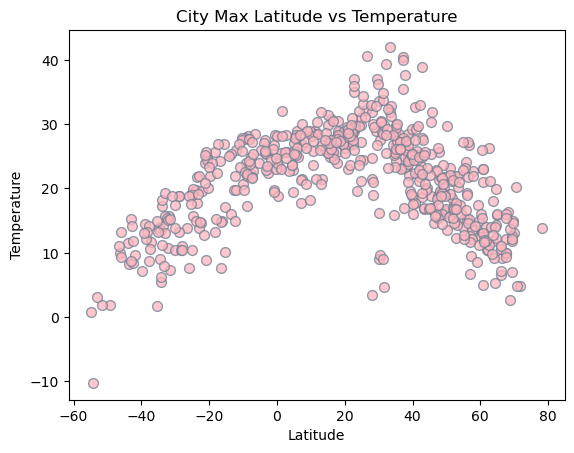

In [29]:
# Build scatter plot for latitude vs. temperature
x_axis=city_data_df['Lat']
y_axis=city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightpink", edgecolors="slategray",
            s=50, alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Max Latitude vs Temperature")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

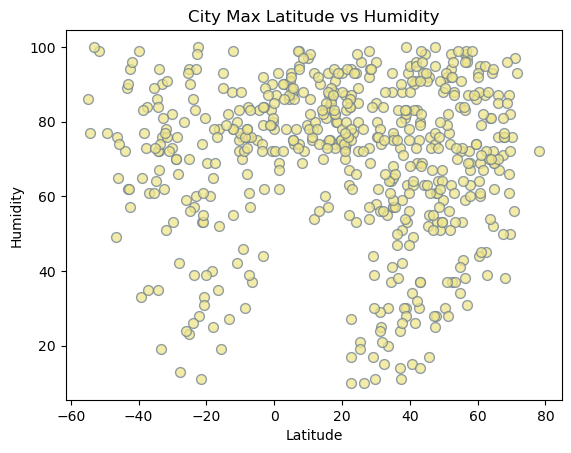

In [33]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_axis=city_data_df['Lat']
y_axis=city_data_df['Humidity']
plt.scatter(x_axis, y_axis, marker="o", facecolors="khaki", edgecolors="slategray",
            s=50, alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Max Latitude vs Humidity")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

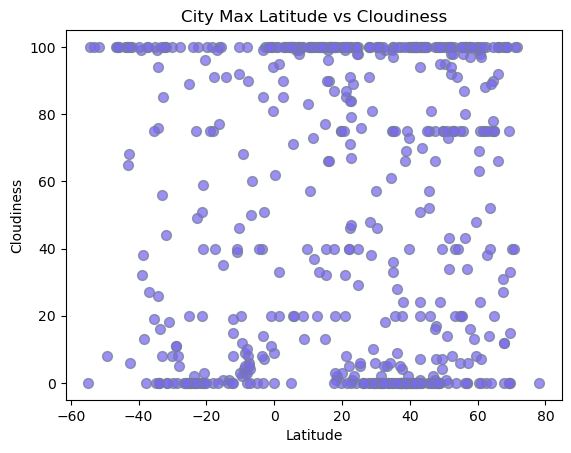

In [34]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_axis=city_data_df['Lat']
y_axis=city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", facecolors="mediumslateblue", edgecolors="slategray",
            s=50, alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs Cloudiness")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

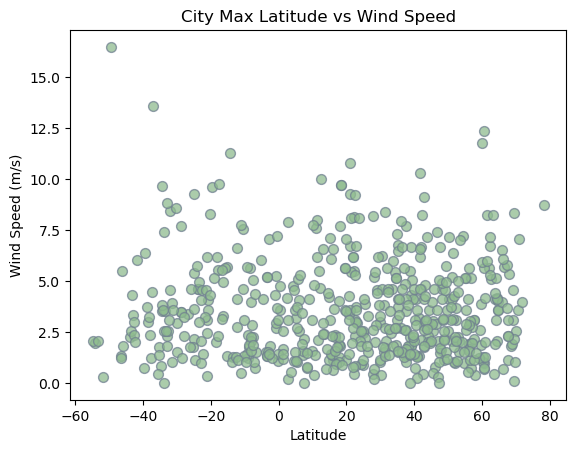

In [36]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_axis=city_data_df['Lat']
y_axis=city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker="o", facecolors="darkseagreen", edgecolors="slategray",
            s=50, alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
import matplotlib.pyplot as plt
slope, intercept, rvalue, pvalue, stderr= linregress(city_data_df["Lat"], city_data_df["Cloudiness"])
line= slope * city_data_df["Lat"] + intercept
slope, intercept, rvalue, pvalue, stderr= linregress(city_data_df["Lat"], city_data_df["Wind Speed"])
line= slope * city_data_df["Lat"] + intercept
slope, intercept, rvalue, pvalue, stderr= linregress(city_data_df["Lat"], city_data_df["Max Temp"])
line= slope * city_data_df["Lat"] + intercept
slope, intercept, rvalue, pvalue, stderr= linregress(city_data_df["Lat"], city_data_df["Humidity"])
line= slope * city_data_df["Lat"] + intercept

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,northam,51.0333,-4.2167,16.45,92,100,5.18,GB,1723251183
3,warman,52.3168,-106.5679,21.95,37,75,3.09,CA,1723251184
4,rongelap,11.1635,166.8941,28.49,75,100,7.62,MH,1723251186
9,wailua homesteads,22.0669,-159.3780,28.44,67,40,6.17,US,1723251191
10,vorgashor,67.5833,63.9500,12.07,71,100,1.15,RU,1723251192


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lng"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rio grande,-32.0350,-52.0986,10.69,78,100,8.42,BR,1723251182
2,northam,51.0333,-4.2167,16.45,92,100,5.18,GB,1723251183
3,warman,52.3168,-106.5679,21.95,37,75,3.09,CA,1723251184
5,lebu,-37.6167,-73.6500,8.78,84,100,1.22,CL,1723251187
6,minas de marcona,-15.2119,-75.1103,10.18,89,35,5.71,PE,1723251188


###  Temperature vs. Latitude Linear Regression Plot

R^2 Value= 0.39


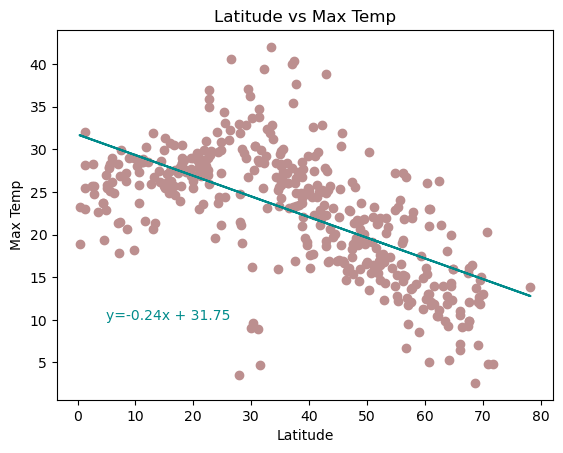

In [64]:
# Linear regression on Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr= linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
line= slope * northern_hemi_df["Lat"] + intercept
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], color="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
plt.plot(northern_hemi_df["Lat"], line, color="darkcyan", label="Linear Regression Line")
plt.annotate(f'y={round(slope,2)}x + {round(intercept,2)}',(5,10),fontsize=10,color="darkcyan")
print("R^2 Value=", round(rvalue**2, 2))

R^2 Value= 0.05


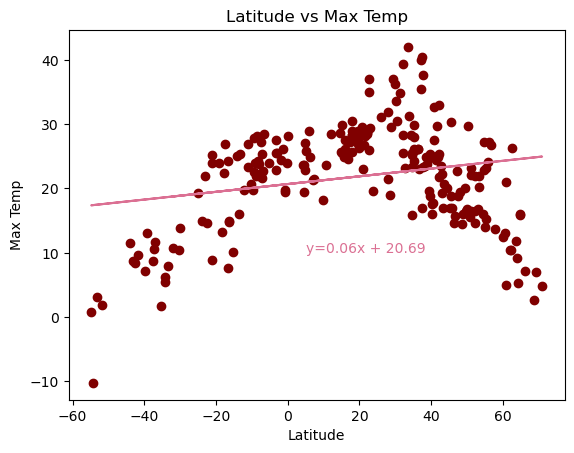

In [63]:
# Linear regression on Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr= linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
line= slope * southern_hemi_df["Lat"] + intercept
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], color="maroon")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
plt.plot(southern_hemi_df["Lat"], line, color="palevioletred", label="Linear Regression Line")
plt.annotate(f'y={round(slope,2)}x + {round(intercept,2)}',(5,10),fontsize=10,color="palevioletred")
print("R^2 Value=", round(rvalue**2, 2))

**Discussion about the linear relationship:** Based on the linear regression lines, in the southern hemisphere, as latitude increases, so does temperature. In the northern hemisphere, as the latitude decreases, the temperature decreases as well. 

### Humidity vs. Latitude Linear Regression Plot

R^2 Value= 0.02


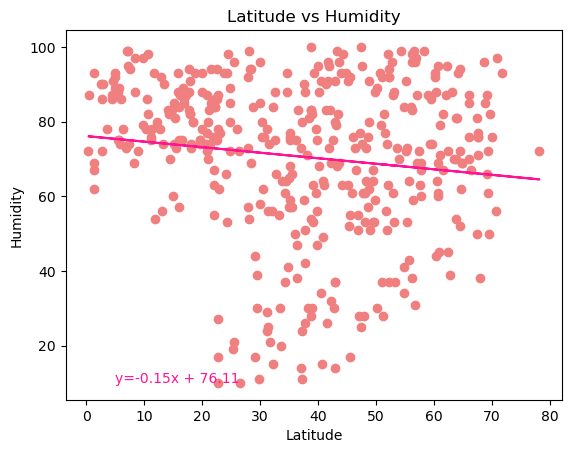

In [66]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr= linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
line= slope * northern_hemi_df["Lat"] + intercept
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], color="lightcoral")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.plot(northern_hemi_df["Lat"], line, color="deeppink", label="Linear Regression Line")
plt.annotate(f'y={round(slope,2)}x + {round(intercept,2)}',(5,10),fontsize=10,color="deeppink")
print("R^2 Value=", round(rvalue**2, 2))

R^2 Value= 0.01


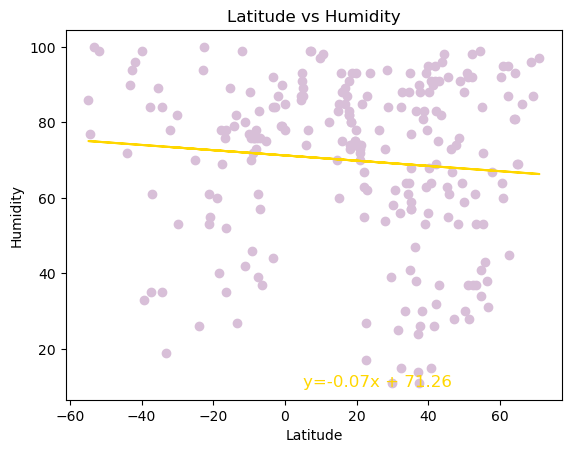

In [72]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr= linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
line= slope * southern_hemi_df["Lat"] + intercept
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], color="thistle")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.plot(southern_hemi_df["Lat"], line, color="gold", label="Linear Regression Line")
plt.annotate(f'y={round(slope,2)}x + {round(intercept,2)}',(5,10),fontsize=12,color="gold")
print("R^2 Value=", round(rvalue**2, 2))

**Discussion about the linear relationship:** Based on the graphs it seems like in both hemispheres, there is very little correlation between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

R^2 Value= 0.02


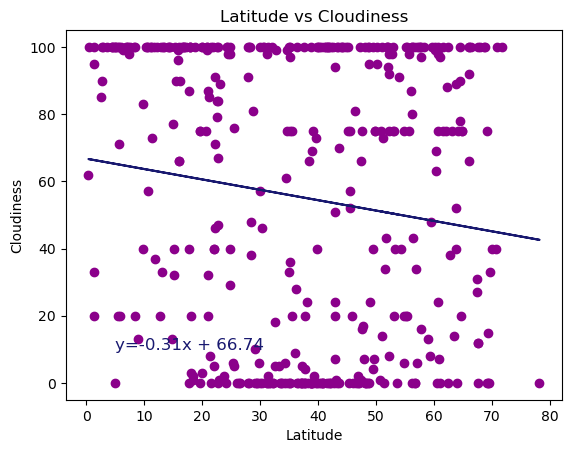

In [71]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr= linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
line= slope * northern_hemi_df["Lat"] + intercept
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], color="darkmagenta")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.plot(northern_hemi_df["Lat"], line, color="midnightblue", label="Linear Regression Line")
plt.annotate(f'y={round(slope,2)}x + {round(intercept,2)}',(5,10),fontsize=12,color="midnightblue")
print("R^2 Value=", round(rvalue**2, 2))

R^2 Value= 0.01


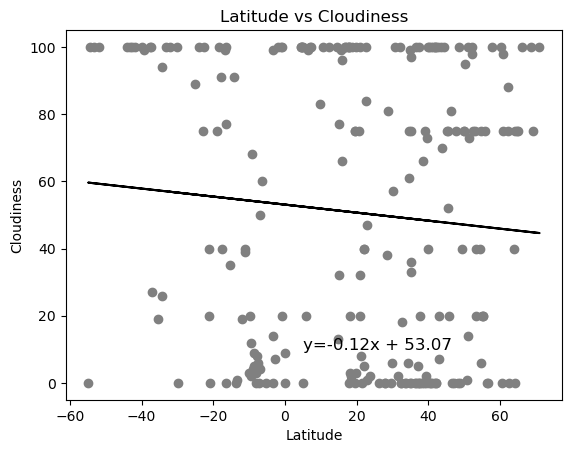

In [73]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr= linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
line= slope * southern_hemi_df["Lat"] + intercept
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], color="gray")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.plot(southern_hemi_df["Lat"], line, color="black", label="Linear Regression Line")
plt.annotate(f'y={round(slope,2)}x + {round(intercept,2)}',(5,10),fontsize=12,color="black")
print("R^2 Value=", round(rvalue**2, 2))

**Discussion about the linear relationship:** Based on the graphs it seems like in both hemispheres cloudiness does not have a strong correlation to latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

R^2 Value= 0.0


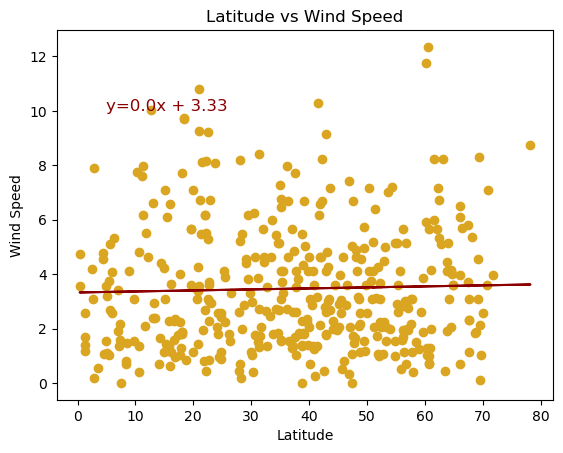

In [75]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr= linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
line= slope * northern_hemi_df["Lat"] + intercept
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], color="goldenrod")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.plot(northern_hemi_df["Lat"], line, color="darkred", label="Linear Regression Line")
plt.annotate(f'y={round(slope,2)}x + {round(intercept,2)}',(5,10),fontsize=12,color="darkred")
print("R^2 Value=", round(rvalue**2, 2))

R^2 Value= 0.01


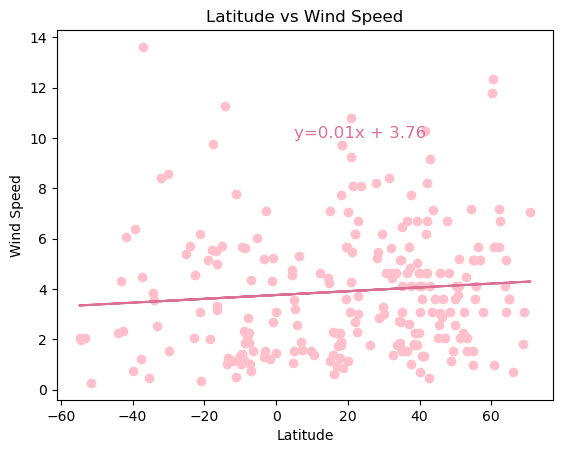

In [79]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr= linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
line= slope * southern_hemi_df["Lat"] + intercept
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], color="pink")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.plot(southern_hemi_df["Lat"], line, color="palevioletred", label="Linear Regression Line")
plt.annotate(f'y={round(slope,2)}x + {round(intercept,2)}',(5,10),fontsize=12,color="palevioletred")
print("R^2 Value=", round(rvalue**2, 2))

**Discussion about the linear relationship:** Based on the graphs, it seems like there is no correlation between latitude and wind speed in the northern hemisphere, and a very small positive correlation in the southern hemisphere. 